<a href="https://colab.research.google.com/github/SaraAlthubaiti/SAAI_SentiMo/blob/main/DNA_Symphony_with_MusicCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#@title Load libraries
from google.colab import drive

drive.mount("/content/gdrive/", force_remount=True)

!git clone https://github.com/Shay9000/MusicCAN.git
%cd ./MusicCAN/
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torch.utils.data as data_utils
from torch.utils.data import TensorDataset, DataLoader
from torchvision.datasets.mnist import MNIST
from torchvision import datasets
import cv2
from model import Generator, Discriminator
from train import train_DCGAN
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import os

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available()  else "cpu")

!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
from IPython.display import Audio
import torchvision
from PIL import Image
#@title Import the biopython libray 
!pip install biopython
!pip install Squiggle

import Bio
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord



Mounted at /content/gdrive/
Cloning into 'MusicCAN'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (328/328), done.
remote: Compressing objects: 100% (324/324), done.
remote: Total 328 (delta 1), reused 328 (delta 1), pack-reused 0
Receiving objects: 100% (328/328), 92.22 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/MusicCAN/MusicCAN/MusicCAN
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


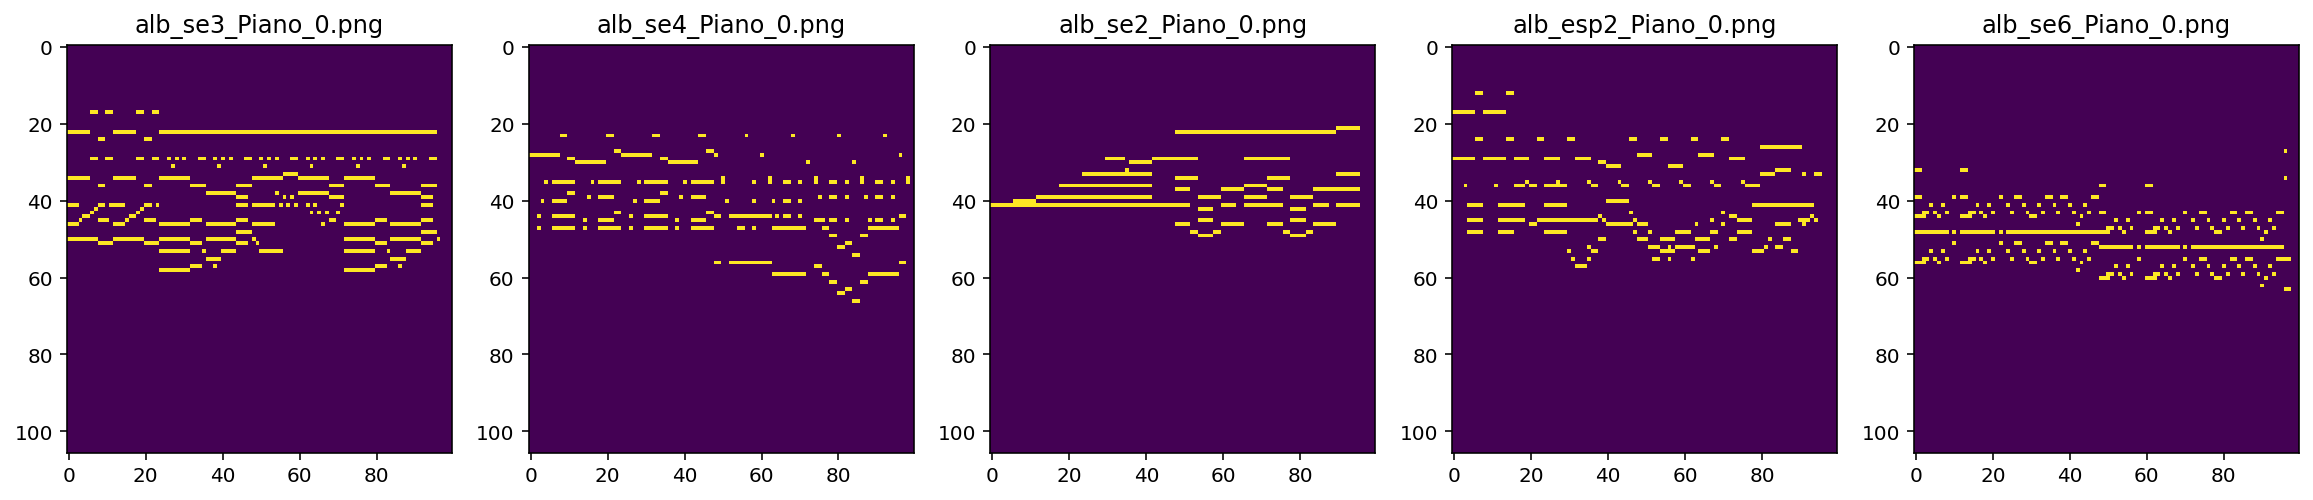

In [ ]:
#@title Preview of the dataset
plt.figure(figsize=(20,20))
test_folder='./image_data/albeniz/'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
#@title Setting hyperparameters
g_lr = 0.02
d_lr = 0.00002
batch_size = 28
num_epochs = 100
n_class = 28

In [ ]:
#@title Initializing the Generator and the Discriminator

G = Generator().to(device)
D = Discriminator().to(device)

optim_G = torch.optim.Adam(G.parameters(), lr=g_lr, betas=(0.05, 0.999))
optim_D = torch.optim.Adam(D.parameters(), lr=d_lr, betas=(0.05, 0.999))

loss_f1 = nn.BCELoss()
loss_f2 = nn.CrossEntropyLoss()


In [ ]:
def ReLU(x):
  return max(x,0)

def DNA_seq(seq):
    symphony_name=seq 
    COVID_sequence = SeqIO.read('/content/cov2.fasta', "fasta")
    Cancer_sequence = SeqIO.read('/content/Cancer_2.fasta', "fasta")
    Alzheimer_sequence = SeqIO.read('/content/alzheimer.fasta', "fasta")
    DNA_dic={'COVID-19':COVID_sequence,'CANCER':Cancer_sequence,'ALZHEIMER':Alzheimer_sequence}

    DNA = DNA_dic[seq].seq #Convert DNA into mRNA Sequence
    mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
    print(mRNA)
    print('Size : ',len(mRNA))
    #Generate symphony from COVID-19 RNA sequences of the diseases 
    nbA = nbC = nbG = nbU = nbTotal = 0
    for nucleotide in mRNA:
        if nucleotide == 'A':
            nbA += 1
        elif nucleotide == 'C':
            nbC += 1
        elif nucleotide == 'G':
            nbG += 1
        elif nucleotide == 'U':
            nbU += 1
        nbTotal += 1
    print("A = ", nbA/len(mRNA))
    print("C = ", nbC/len(mRNA))
    print("U = ", nbU/len(mRNA))
    print("G = ", nbG/len(mRNA))
    mRNA_freq=max(nbA/len(mRNA), nbC/len(mRNA),nbU/len(mRNA),nbG/len(mRNA))
    return mRNA_freq
    

In [ ]:
# Main 
#input
seq=input("Please choose one of the following diseases to generate its DNA symphony: (COVID-19, Alzheimer, Cancer)")
seq=seq.upper()
DNA_frq= DNA_seq(seq)

Please choose one of the following diseases to generate its DNA symphony: (COVID-19, Alzheimer, Cancer)Alzheimer
CCAGAAAGUUGCUUACCCCUGAUCUAAGAUAUUCAGUAUUCAACACACUGACACGCCACAGCAUAGCCAUCCCUGAGAAGAAUAGCGCAGAUCCACUUCUAUUUUGCUUCCUGCCCAUGUUCUGGUUACAUAAUAUUCUAGAUGAUCUGCGUGAUCAGCAACCUUCUGACGUCUUUUAAUCCGCUCCCACAUUAUGUCAUAUAGCUCUGUGCCCAUUAGUUUUGAUAUUCUGUGACGACCUUCUUUCGGCCGUGUUACUUUUCUUUCAGUUGGUUUCACUGACUCAUAUAGCGUACGUUCGAUGGAGGCUGGCGAUCGAACAUUAAAGAGUUCACGGCAUCCUCAGCAGCGAACACAUAUGUAAAGACGCUUCUCCAUUAUGUAGCAGAUCAGGUCAACGGUUCCAUGGAAUCAGUGAUGAUCUGACCAGUUCAGAGAAAUACUCCAAGAAGUGUUAUCUGUGAAUGAGCAACUGAUUAUGGUAACUGUUCAUUUGCAUCCGUUGAAUCUGCUUUGCACAUCGUUCUCCUACAUUGGACGGAUGGUGAAAGUAGACUAUGAACAUCAAUCAUAGGAAACAGCAAUUAUUUACGAUUAUUGCAUUCGAUUACGUCAUUUGCUCUACCGGCGAAUAUCUGGUUGAAAUGAGUGUUUCUGUUACACAGAUCAAAUAAUCCCAUUAAAUAGCUUCAUGAGGCUGUUCUGUGACUAUGCGGCGGAUAUCAACGACCGACGGCUGAAGCAACAUAAGGAAGUACACCGGCAGGCGUCUAAAUGUUAAUAAAAAACCAGCAUGCGGCAAUGUAACAAGUGUUCAAAAACUCUGACUCAUGCGCUGACGGGUAGAAGCUAUUGAAUGUGGUCAGAUUUUUCCACCAACUGGAACA

In [ ]:
#Loading pre-trained Unrolled Music Creative GAN
#genarate noice (Our add)
_noic=DNA_frq/4
G.net[16]=nn.ReLU(_noic)
G.load_state_dict(torch.load("./G.pt",map_location=torch.device('cpu')))
G.eval()


Generator(
  (net): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

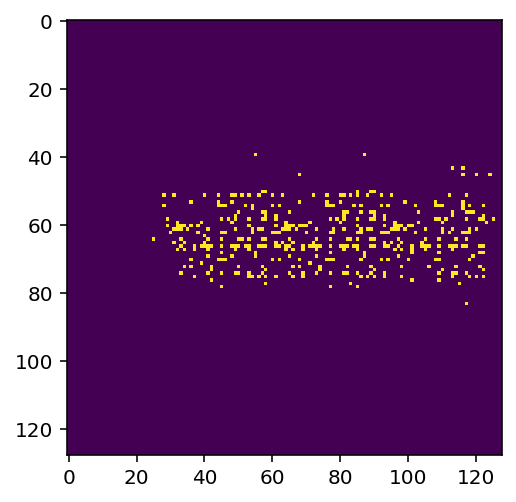

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'Alzheimer.wav'..


In [ ]:
#Generate DNAmusic (you can generate a different piece by running this again!)
from torchvision.utils import make_grid
noise = torch.randn(1, 100, device=device)
img_fake = G(noise)
img=img_fake[0,0,:,:].cpu().detach().numpy()
for i in range(128):
    for j in range(128):
        if img[i][j]>0.1:
            img[i][j]=255
        else:
            img[i][j]=0
plt.imshow(img)
plt.show()

#@title Save generated music
from PIL import Image
import numpy as np
from music21 import instrument, note, chord, stream

lowerBoundNote = 21
def column2notes(column):
    notes = []
    for i in range(len(column)):
        if column[i] >0:
            notes.append(i+lowerBoundNote)
    return notes

resolution = 0.25
def updateNotes(newNotes,prevNotes): 
    res = {} 
    for note in newNotes:
        if note in prevNotes:
            res[note] = prevNotes[note] + resolution
        else:
            res[note] = resolution
    return res

def image2midi(image):
    im_arr = np.flip(image, 0) #np.frombuffer(image.tobytes(), dtype=np.uint8)
    try:
        im_arr = im_arr.reshape((image.shape[0], image.shape[1]))
    except:
        im_arr = im_arr.reshape((image.shape[0], image.shape[1],3))
        im_arr = np.dot(im_arr, [0.33, 0.33, 0.33])

    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model

    prev_notes = updateNotes(im_arr.T[0,:],{})
    for column in im_arr.T[1:,:]:
        notes = column2notes(column)
        # pattern is a chord
        notes_in_chord = notes
        old_notes = prev_notes.keys()
        for old_note in old_notes:
            if not old_note in notes_in_chord:
                new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
                new_note.storedInstrument = instrument.Piano()
                if offset - prev_notes[old_note] >= 0:
                    new_note.offset = offset - prev_notes[old_note]
                    output_notes.append(new_note)
                elif offset == 0:
                    new_note.offset = offset
                    output_notes.append(new_note)                    
                else:
                    print(offset,prev_notes[old_note],old_note)

        prev_notes = updateNotes(notes_in_chord,prev_notes)

        # increase offset each iteration so that notes do not stack
        offset += resolution

    for old_note in prev_notes.keys():
        new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
        new_note.storedInstrument = instrument.Piano()
        new_note.offset = offset - prev_notes[old_note]

        output_notes.append(new_note)

    prev_notes = updateNotes(notes_in_chord,prev_notes)

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp="generated_creative.mid")

import sys
image2midi(img)
!fluidsynth -ni font.sf2 ./generated_creative.mid -F Covid19.wav -r 44100
Audio('Covid_19.wav')